In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
import heejin
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.linear_model import LogisticRegression,LinearRegression,LogisticRegressionCV,Ridge,Lasso,RidgeCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
houseDF = pd.read_csv('../data/HousingData.csv')
houseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
houseDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
houseDF.corr()['MEDV'].abs().sort_values(ascending=False)  # LSTAT, RM, PTRATIO, INNDUS, TAX 등등

MEDV       1.000000
LSTAT      0.735822
RM         0.695360
PTRATIO    0.507787
INDUS      0.481772
TAX        0.468536
NOX        0.427321
AGE        0.394656
CRIM       0.391363
RAD        0.381626
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
Name: MEDV, dtype: float64

In [6]:
houseDF.isna().sum() # 결측치 존재 -> 박스플롯과 히스토그램 보고 무슨 값으로 대체하면 좋을지 판단 -> 삭제도 해보고 대체도 해보자

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
# houseDF.dropna(inplace=True)

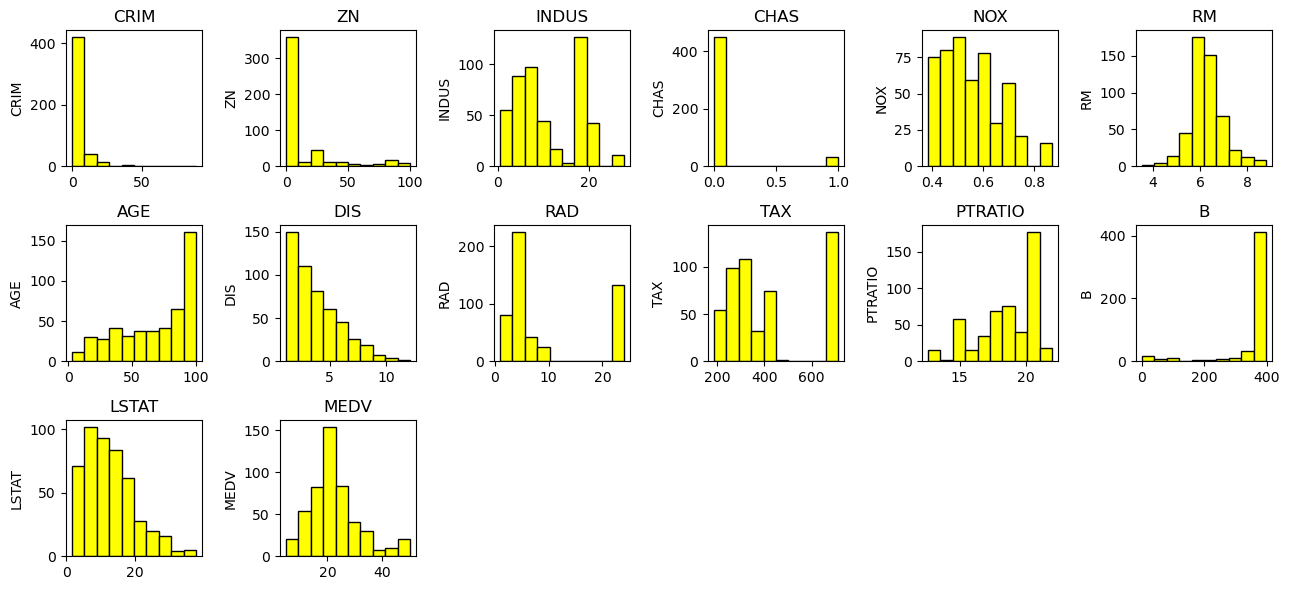

In [8]:
plt.figure(figsize=(13,6))
heejin.print_hist(3,6,houseDF[:-1])

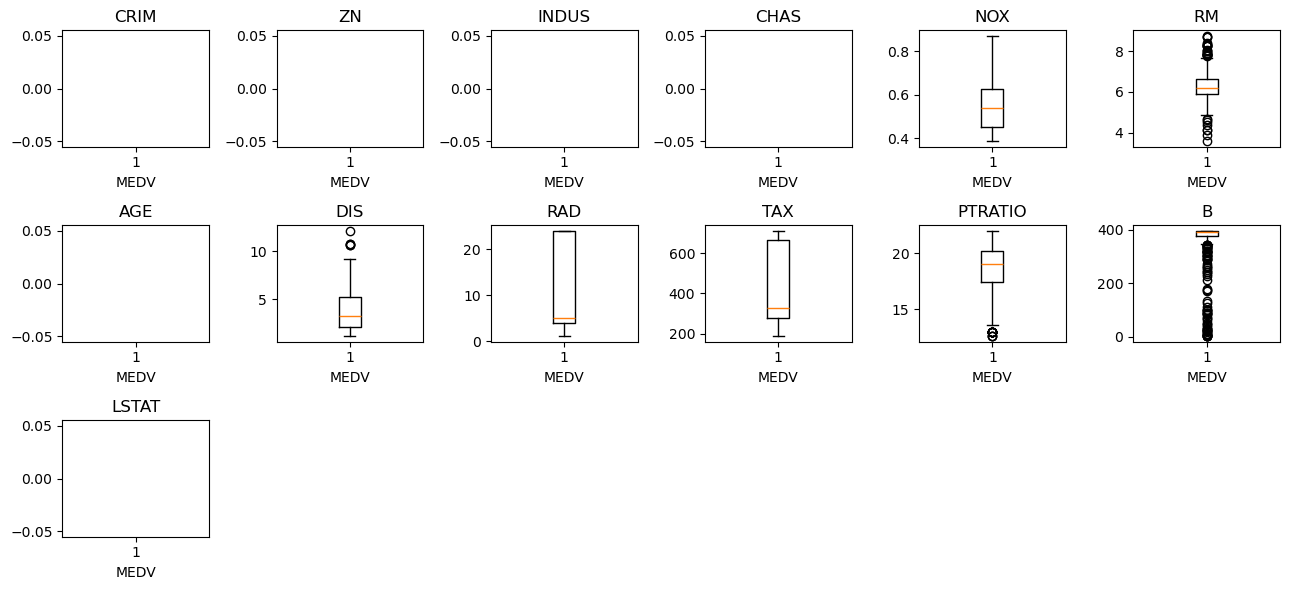

In [9]:
plt.figure(figsize=(13,6))
heejin.print_box(3,6,houseDF['MEDV'],houseDF[houseDF.columns[:-1]])  #  TAX와 MEDV 범위가 너무 큼 -> 스케일링 필요

In [10]:
# 결측치 LSTAT-midian, RM-mean, PTRATIO-midian, INNDUS-mean, TAX-median 으로 대체
houseDF['LSTAT'].fillna(houseDF['LSTAT'].median(), inplace=True)
houseDF['RM'].fillna(houseDF['RM'].mean(), inplace=True)
houseDF['PTRATIO'].fillna(houseDF['PTRATIO'].median(), inplace=True)
houseDF['INDUS'].fillna(houseDF['INDUS'].mean(), inplace=True)
houseDF['TAX'].fillna(houseDF['TAX'].median(), inplace=True)

In [11]:
# 이상치 - 이상치에 덜 민감한 minmax나 robust 스케일러 적용
heejin.find_outlier_z(houseDF,3)

z - CRIM의 이상치 개수 : 8
z - ZN의 이상치 개수 : 14
z - INDUS의 이상치 개수 : 0
z - CHAS의 이상치 개수 : 34
z - NOX의 이상치 개수 : 0
z - RM의 이상치 개수 : 8
z - AGE의 이상치 개수 : 0
z - DIS의 이상치 개수 : 5
z - RAD의 이상치 개수 : 0
z - TAX의 이상치 개수 : 0
z - PTRATIO의 이상치 개수 : 0
z - B의 이상치 개수 : 25
z - LSTAT의 이상치 개수 : 6
z - MEDV의 이상치 개수 : 0


In [12]:
houseDF.corr()['MEDV'].abs().sort_values(ascending=False)
# LSTAT, RM, PTRATIO, INDUS, TAX

MEDV       1.000000
LSTAT      0.723093
RM         0.695360
PTRATIO    0.507787
INDUS      0.478657
TAX        0.468536
NOX        0.427321
AGE        0.394656
CRIM       0.391363
RAD        0.381626
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
Name: MEDV, dtype: float64

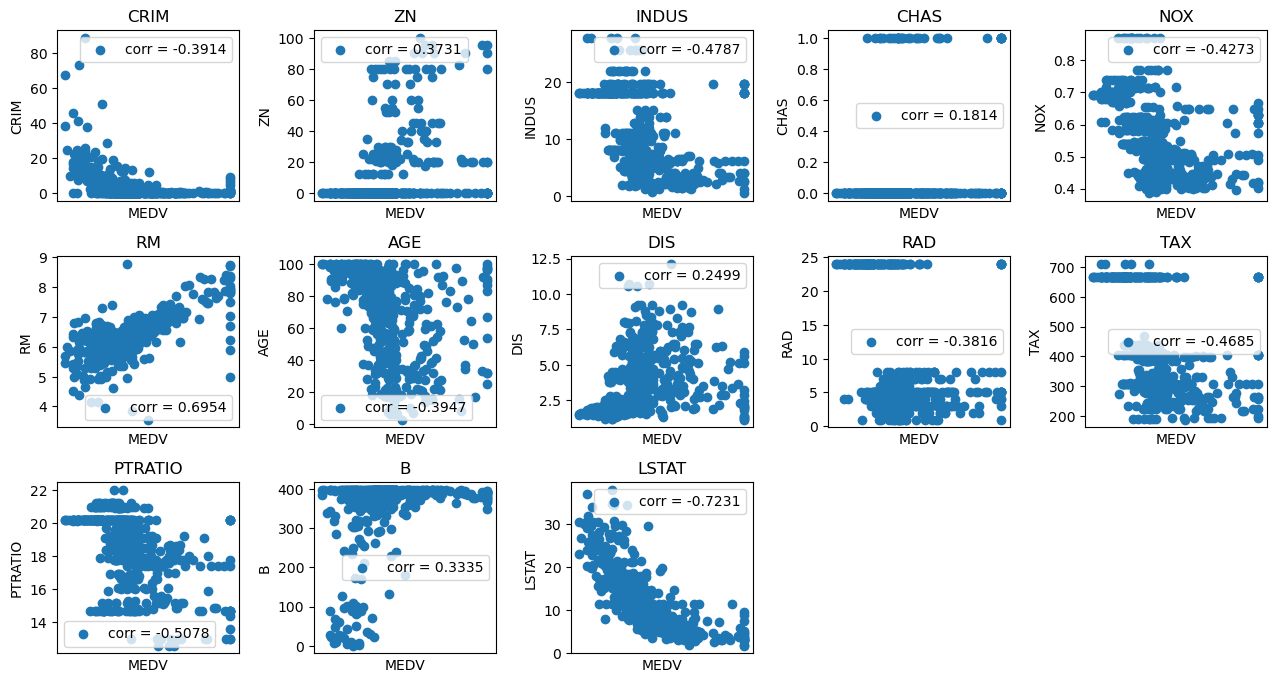

In [13]:
plt.figure(figsize=(13,9))
heejin.print_scatter(4,5,houseDF['MEDV'],houseDF[houseDF.columns[:-1]])
# LSTAT, RM, PTRATIO, INDUS, TAX -> 약간 선형을 띰

In [14]:
# LSTAT, RM, PTRATIO, INNDUS, TAX
featureDF = houseDF[['LSTAT','RM','PTRATIO','INDUS','TAX']]
targetSR = houseDF[houseDF.columns[-1]]

In [15]:
# 피쳐들끼리 상관관계도 확인
featureDF.corr() # TAX와 INDUS / RM과 LSTAT / LSTAT와 INDUS 상관관계 높음

,LSTAT,RM,PTRATIO,INDUS,TAX
LSTAT,1.000000,-0.604323,0.370727,0.567859,0.524156
RM,-0.604323,1.000000,-0.355501,-0.381457,-0.292048
PTRATIO,0.370727,-0.355501,1.000000,0.384806,0.460853
INDUS,0.567859,-0.381457,0.384806,1.000000,0.716062
TAX,0.524156,-0.292048,0.460853,0.716062,1.000000


In [16]:
max_random = heejin.find_random_state(featureDF,targetSR) # 21

radom_state = 44
score : 0.7783680164386728


In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(featureDF,targetSR, test_size=0.2, random_state=max_random)

In [18]:
b_max, d_max = heejin.find_poly_p(xtrain,ytrain,xtest,ytest)

True 1 0.7783680164386729
True 2 0.8576159345983854
True 3 0.8637195780660005
True 4 0.8645684429550522
True 5 0.8652270561001528
False 1 0.7783680164386729
False 2 0.8580267456947333
False 3 0.8713681591230122
False 4 0.7978897741451118
False 5 -7.019200778544528
max score =>
interaction_only = False, degree = 3, score = 0.8713681591230122


In [21]:
poly = PolynomialFeatures(interaction_only=b_max, degree=2)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.fit_transform(xtest)
xtrain_poly.shape, xtest_poly.shape

((404, 21), (102, 21))

In [22]:
model_score = heejin.find_re_model(xtrain_poly,ytrain,xtest_poly,ytest,'r2')
# (Ridge(alpha=0.5), RobustScaler(), 0.9282636781837633)

----------------탐색중------------------
model : KNeighborsRegressor(n_neighbors=2)
scaler : StandardScaler()
Train score : 0.9378651382960107
Test score : 0.8466763046495317

    [모델 설명도]
R2 : 0.8466763046495317
[에러]
MAE : 2.7637254901960784
MSE : 12.950882352941177
RMSE : 3.598733437327802
--------------------------------------
    
model : LinearRegression()
scaler : StandardScaler()
Train score : 0.8287501822766425
Test score : 0.8580267456947539

    [모델 설명도]
R2 : 0.8580267456947539
[에러]
MAE : 2.527959150541693
MSE : 11.992138002991503
RMSE : 3.4629666476868506
--------------------------------------
    
model : Ridge(alpha=29.900000000000002, max_iter=30000)
scaler : StandardScaler()
Train score : 0.7451070235365201
Test score : 0.8360875499960445

    [모델 설명도]
R2 : 0.8360875499960445
[에러]
MAE : 2.8228804684351316
MSE : 13.84528889243927
RMSE : 3.72092581119797
--------------------------------------
    
model : Lasso(alpha=0.1, max_iter=30000)
scaler : StandardScaler()
Train score 

In [23]:
scoreDF = pd.DataFrame(model_score)
scoreDF

,model,scaler,train_score,test_score,r2,mae,mse,rmse
0,KNeighborsRegressor(n_neighbors=2),StandardScaler(),0.937865,0.846676,0.846676,2.763725,12.950882,3.598733
1,LinearRegression(),StandardScaler(),0.828750,0.858027,0.858027,2.527959,11.992138,3.462967
2,"Ridge(alpha=29.900000000000002, max_iter=30000)",StandardScaler(),0.745107,0.836088,0.836088,2.822880,13.845289,3.720926
3,"Lasso(alpha=0.1, max_iter=30000)",StandardScaler(),0.768067,0.851323,0.851323,2.712199,12.558363,3.543778
4,KNeighborsRegressor(n_neighbors=2),MinMaxScaler(),0.937015,0.836531,0.836531,2.791667,13.807819,3.715887
5,LinearRegression(),MinMaxScaler(),0.828750,0.858027,0.858027,2.527959,11.992138,3.462967
6,"Ridge(alpha=29.900000000000002, max_iter=30000)",MinMaxScaler(),0.584770,0.664194,0.664194,3.917358,28.364705,5.325853
7,"Lasso(alpha=0.1, max_iter=30000)",MinMaxScaler(),0.687858,0.791605,0.791605,3.184058,17.602595,4.195545
8,KNeighborsRegressor(n_neighbors=2),RobustScaler(),0.918933,0.837561,0.837561,2.820098,13.720858,3.704168
9,LinearRegression(),RobustScaler(),0.828750,0.858027,0.858027,2.527959,11.992138,3.462967


In [ ]:
scaler = MinMaxScaler()

scaled_xtrain = scaler.fit_transform(xtrain_poly)
scaled_xtest = scaler.transform(xtest_poly)

In [ ]:
model = KNeighborsRegressor(n_neighbors=8)

model.fit(scaled_xtrain, ytrain)
model.score(scaled_xtrain,ytrain), model.score(scaled_xtest,ytest)  # 테스트용 데이터에 과대적합..

In [ ]:
pram = {'weights':['uniform', 'distance']
        ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
        ,'p':[1,2]
        }

cv = GridSearchCV(model, param_grid=pram,return_train_score=True)
cv.fit(scaled_xtrain,ytrain)

In [ ]:
best_model = cv.best_estimator_
best_model

In [ ]:
# 학습/검증에 대한 평가 모든 결과에 대한 처리

# GridSearchCV 시행할거면 안해도 됨
result = cross_validate(best_model,
                        scaled_xtrain,
                        ytrain,
                        return_train_score=True,
                        return_estimator=True,
                        scoring=('r2', 'neg_mean_squared_error')) 

In [ ]:
resultDF = pd.DataFrame(result)
resultDF

In [ ]:
result.best_estimator_  # 학습이 되어있는 최적의 모댈

In [ ]:
best_model.score(scaled_xtrain,ytrain), best_model.score(scaled_xtest,ytest) # 학습용 데이터셋에 너무 과대적합이라서 Ridge나 Lasso로 한번 더 진행

In [ ]:
# 회귀 모델 성능 평가 지표
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
y_pre = model.predict(scaled_xtest)
r2 = r2_score(ytest, y_pre)
mse = mean_squared_error(ytest, y_pre)
mae = mean_absolute_error(ytest, y_pre)
rmse = mean_squared_error(ytest, y_pre, squared=False)
print(f'''
[모델 설명도]\nR2 : {r2}\n[에러]\nMAE : {mae}\nMSE : {mse}\nRMSE : {rmse}
''')

In [ ]:
# 예측
newdata = xtest_poly[0,:].reshape(-1,1).T

best_model.predict(newdata), ytest[0]

In [ ]:
scaler = StandardScaler()

scaled_xtrain = scaler.fit_transform(xtrain_poly)
scaled_xtest = scaler.transform(xtest_poly)

In [ ]:
model = Ridge(max_iter=3000)

model.fit(scaled_xtrain,ytrain)
model.score(scaled_xtrain,ytrain),model.score(scaled_xtest,ytest)

In [ ]:
import numpy as np
pram = {'alpha': np.arange(0.1, 30., 0.1).tolist()
        ,'solver':['lbfgs','liblinear', 'library', 'newton-cg', 'sag', 'saga']
        ,'fit_intercept':[True, False]
        ,'positive':[True, False]
        }
# 랜덤 조합 있음
cv = GridSearchCV(model, param_grid=pram,return_train_score=True)
cv.fit(scaled_xtrain,ytrain)

In [ ]:
best_model = cv.best_estimator_  # 학습이 되어있는 모델
best_model

In [ ]:
best_model.score(scaled_xtrain,ytrain), best_model.score(scaled_xtest,ytest)

In [ ]:
y_pre = model.predict(scaled_xtest)
r2 = r2_score(ytest, y_pre)
mse = mean_squared_error(ytest, y_pre)
mae = mean_absolute_error(ytest, y_pre)
rmse = mean_squared_error(ytest, y_pre, squared=False)
print(f'''
[모델 설명도]\nR2 : {r2}\n[에러]\nMAE : {mae}\nMSE : {mse}\nRMSE : {rmse}
''')

In [ ]:
# 예측
newdata = xtest_poly[0,:].reshape(-1,1).T

best_model.predict(newdata) # 못써먹을 모델